In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
pd.options.display.max_columns=None
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import confusion_matrix

In [200]:
warnings.simplefilter("ignore")

In [201]:
data = pd.read_csv('fraude_tc.csv')

In [202]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Descripcion de las columnas  
distancefromhome - la distancia a la que la transacción ocurrió desde la dirección de facturación  
distancefromlast_transaction - la distancia de la última transacción  
ratiotomedianpurchaseprice - ratio de el monto de transacción sobre la mediana   
repeat_retailer - si la transacción se dió sobre un retailer repetido  
used_chip - si la transacción es por chip  
usedpinnumber - si la transacción es por PIN  
online_order - si la transacción es online  
fraud - si la transacción fue o no fraudulenta  

## Busco nulos en el df

In [203]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [204]:
data[data['distance_from_home']<0]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [205]:
data[data['distance_from_last_transaction']<0]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


So, there is no record having negative values of distance like variables, and from this aspect the data is clean again

El dataset no tiene nulos en ninguna de las columnas

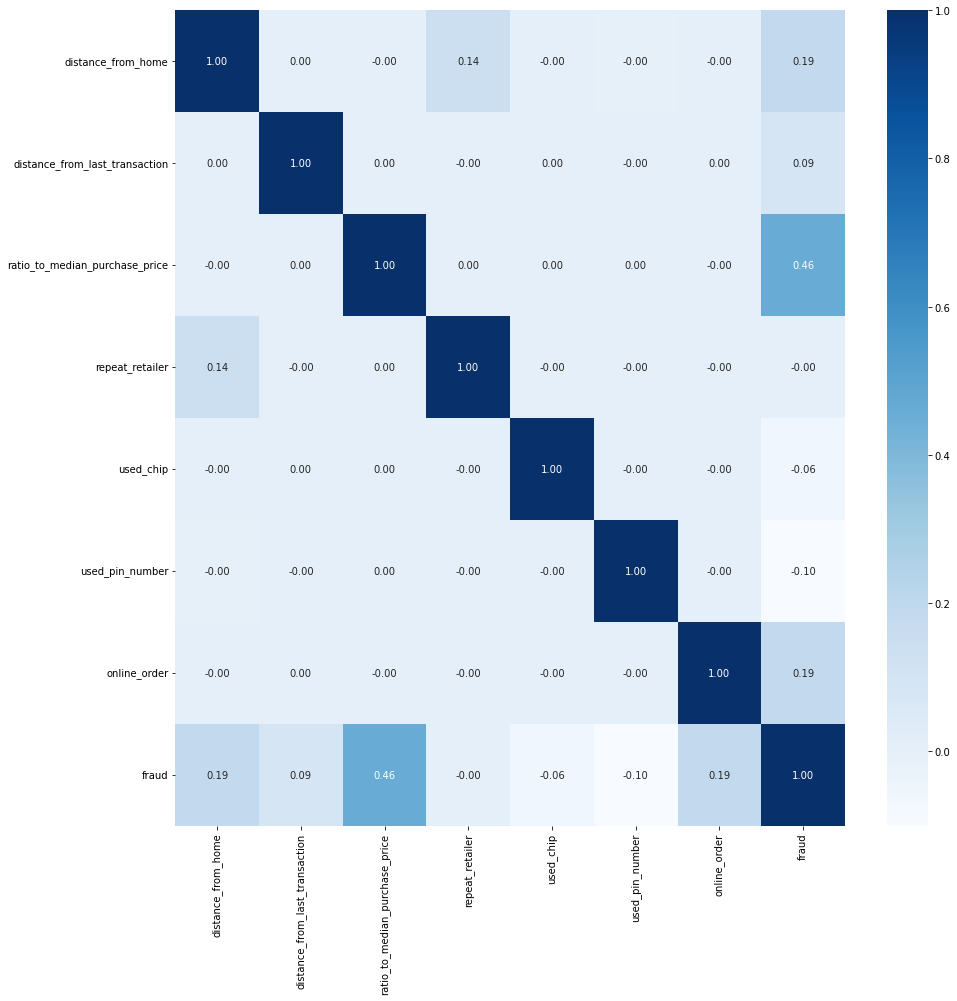

In [206]:
# Hago un heatmap de la matriz de correlacion
fig = plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cbar=True, annot=True, fmt='.2f',cmap='Blues')
plt.show()


Cantidad de registros que son fraude  en todo el dataset

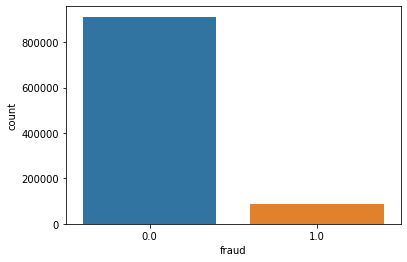

In [207]:
sns.countplot(x='fraud', data= data)
plt.show()

In [208]:
porc_fraude = data.fraud.value_counts()/ data.shape[0]*100
print('El',porc_fraude[1],'% de los registros son casos de fraudes')


El 8.7403 % de los registros son casos de fraudes


Fraude en los distintos tipos de transaccion

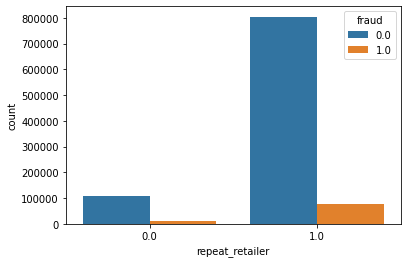

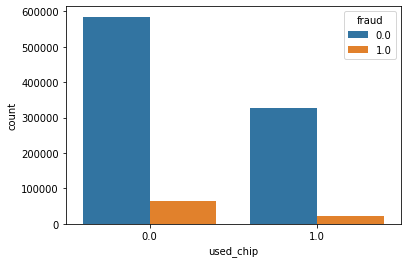

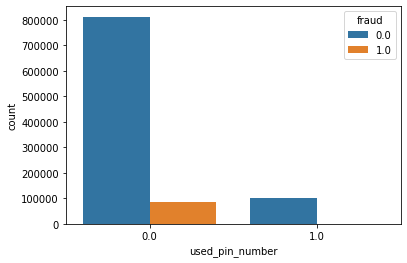

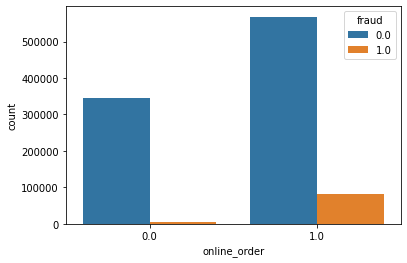

In [209]:
for col in ['repeat_retailer','used_chip','used_pin_number','online_order']:
    sns.countplot(data=data,x=col,hue='fraud')
    plt.show()

Hay transacciones online y a la vez con chip

In [210]:
data[(data.online_order==1) & (data.used_chip==1)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
10,14.263530,0.158758,1.136102,1.0,1.0,0.0,1.0,0.0
11,13.592368,0.240540,1.370330,1.0,1.0,0.0,1.0,0.0
15,179.665148,0.120920,0.535640,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999982,3.805818,0.685528,0.336647,1.0,1.0,0.0,1.0,0.0
999987,12.539374,1.773940,0.792166,1.0,1.0,0.0,1.0,0.0
999990,20.334489,11.437333,0.699527,1.0,1.0,0.0,1.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0


Las borro del dataset porque no pueden ser posibles

In [211]:
data = data.drop((data[(data.online_order==1) & (data.used_chip==1)]).index)
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999993,4.846253,2.844450,0.867740,1.0,0.0,0.0,1.0,0.0
999994,3.295884,0.085712,0.831991,1.0,0.0,0.0,1.0,0.0
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0


Defino funcion que comprueba el score del modelo

In [212]:
def Accuracy_score(data,model):

    #Defino columna target y la saco del resto del dataset
    X=data.drop(['fraud'], axis = 1) 
    y=data['fraud']
    
    #Separo el dataset en train y test
    X_train, X_Test, y_train, y_Test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

    #Entreno modelo
    model.fit(X_train, y_train)

    #Prediccion
    yPred= model.predict(X_Test)

    Accuracy = accuracy_score(y_Test, yPred) 
    print("Accuracy " + str(Accuracy))
    Precision = precision_score(y_Test, yPred) 
    print("Precision " + str(Precision))  
  
    #Matriz de Confusion
    LABELS = ['Normal', 'Fraud'] 
    conf_matrix = confusion_matrix(y_Test, yPred) 
    plt.figure(figsize =(12, 12)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d",cmap='Blues'); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show() 
   
    

    return Accuracy


In [213]:
"""print('train shape: X:',X_train.shape,'Y:', y_train.shape)
print('test shape: X:',X_test.shape,'Y:', y_test.shape)"""

"print('train shape: X:',X_train.shape,'Y:', y_train.shape)\nprint('test shape: X:',X_test.shape,'Y:', y_test.shape)"

PRUEBO EL ACCURACY DE LOS MODELOS

Random Forest

Accuracy 0.9999740966196089
Precision 1.0


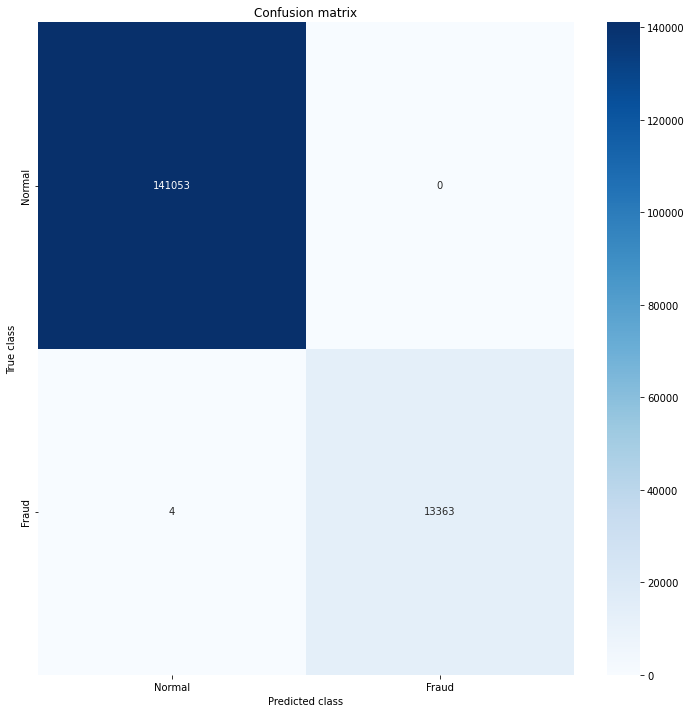

In [214]:
RFC = RandomForestClassifier(n_jobs=4, random_state=0, criterion='gini', n_estimators=100, verbose=False)
AccuracyRFC=Accuracy_score(data,RFC)

Logistic Regression

Accuracy 0.9615011008936666
Precision 0.9019714038128249


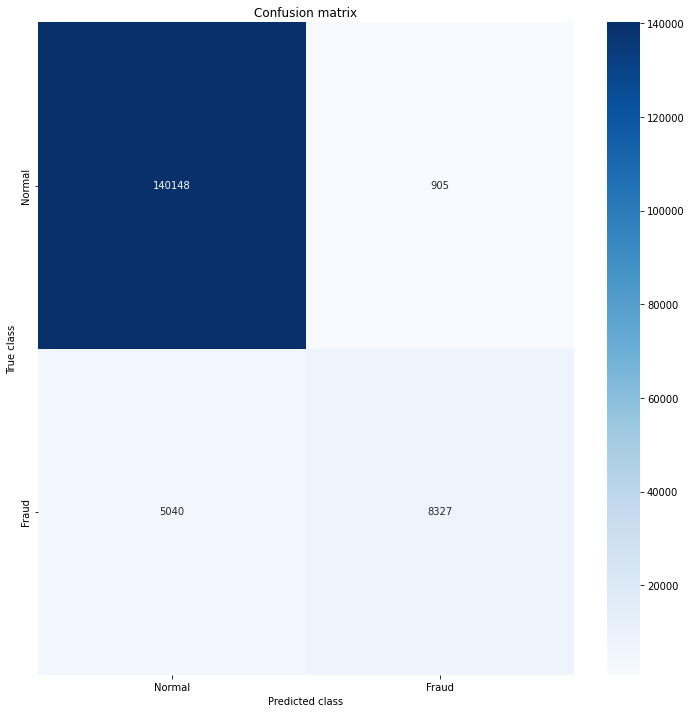

In [215]:
LR = LogisticRegression()
AccuracyLR=Accuracy_score(data,LR)

Kneighbors Classifier 

Accuracy 0.9849630876829426
Precision 0.895169946332737


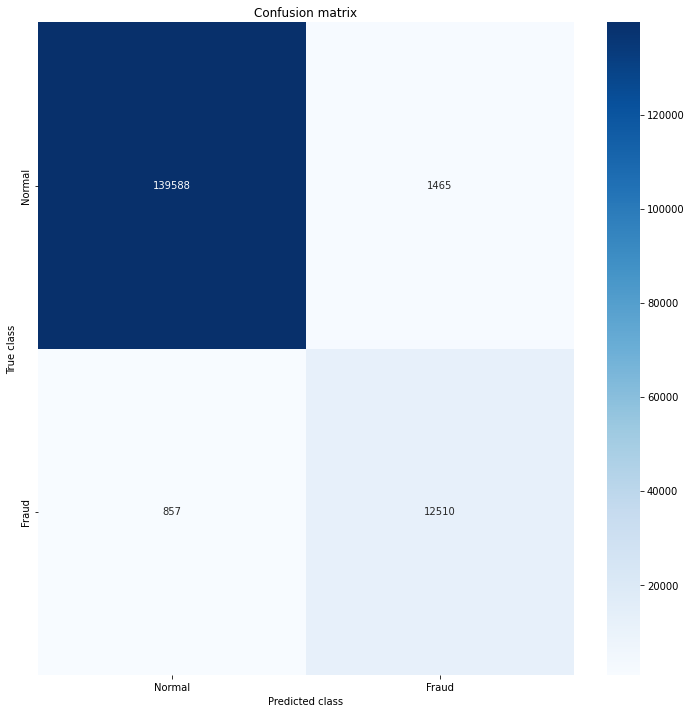

In [216]:
KNC = KNeighborsClassifier(n_neighbors=5)
AccuracyKNC=Accuracy_score(data,KNC)

Decision Tree classifier

Accuracy 0.99903509908043
Precision 0.9936510307738273


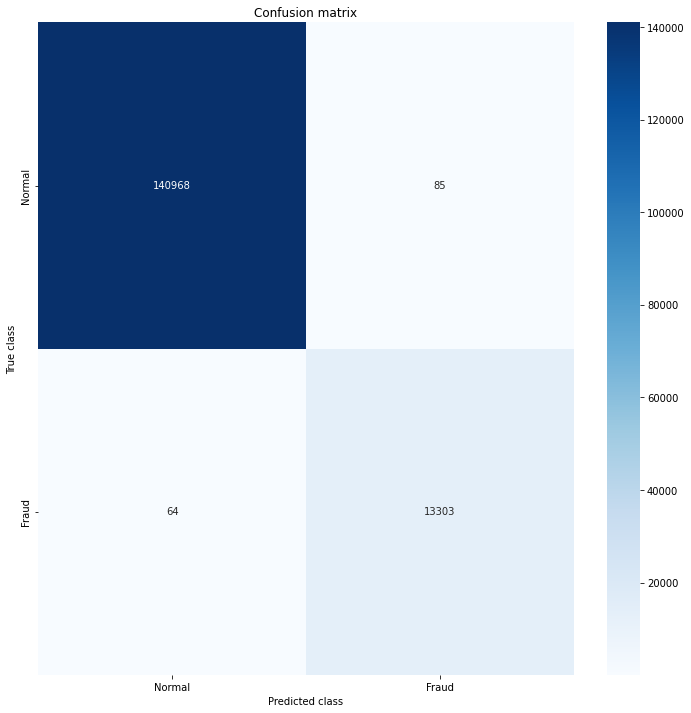

In [217]:
DTC = DecisionTreeClassifier(max_leaf_nodes=15, random_state=0, criterion='entropy')
AccuracyDTC=Accuracy_score(data,DTC)

Modelo con mejor score RandomForestClassifier

In [218]:
print('El modelo con mejor accuracy es RandomForestClassifier:', AccuracyRFC)

El modelo con mejor accuracy es RandomForestClassifier: 0.9999740966196089
